# Visualizing the Data Analysis LangGraph Application

This notebook demonstrates how to visualize the graph structure of our LangGraph-based data analysis application using the ipykernel in VSCode.

In [1]:
# Import necessary libraries
import os
import sys
from IPython.display import Image, display

# Add parent directory to path to import our application modules
current_dir = os.getcwd()
if current_dir not in sys.path:
    sys.path.append(current_dir)

# Import our application
from my_agent import create_graph

## Create and Visualize the Graph

Now we'll create our application graph and visualize it using Graphviz.

In [2]:
# Create the graph
graph = create_graph()

# Get the underlying graph object
graph_obj = graph.get_graph()

# Print some basic information about the graph
print(f"Graph nodes: {graph_obj.nodes}")
print(f"Graph edges: {list(graph_obj.edges)}")

Graph nodes: {'__start__': Node(id='__start__', name='__start__', data=RunnablePassthrough(), metadata=None), 'initialize': Node(id='initialize', name='initialize', data=initialize(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'process': Node(id='process', name='process', data=process(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'save': Node(id='save', name='save', data=save(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}
Graph edges: [Edge(source='__start__', target='initialize', data=None, conditional=False), Edge(source='initialize', target='process', data=None, conditional=False), Edge(source='process', target='save', data=None, conditional=False), Edge(source='save', target='__end__', data=None, conditional=False)]


## Alternative: Visualize Using Mermaid

If Graphviz isn't working, we can also use Mermaid syntax to visualize our graph.

In [3]:
# Generate Mermaid syntax representation of the graph
mermaid_syntax = graph_obj.draw_mermaid()
print(mermaid_syntax)

---
config:
  flowchart:
    curve: linear
---
graph TD;
	__start__([<p>__start__</p>]):::first
	initialize(initialize)
	process(process)
	save(save)
	__end__([<p>__end__</p>]):::last
	__start__ --> initialize;
	initialize --> process;
	process --> save;
	save --> __end__;
	classDef default fill:#f2f0ff,line-height:1.2
	classDef first fill-opacity:0
	classDef last fill:#bfb6fc



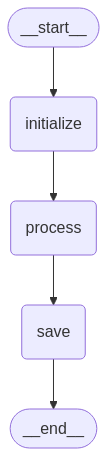

In [4]:
# Alternative: Using Mermaid.Ink API to render as PNG
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

try:
    # Generate and display a PNG visualization using Mermaid.Ink API
    mermaid_png = graph_obj.draw_mermaid_png(
        draw_method=MermaidDrawMethod.API,
        curve_style=CurveStyle.LINEAR,
        node_colors=NodeStyles(first="#ffdfba", last="#baffc9", default="#f2f0ff")
    )
    display(Image(mermaid_png))
except Exception as e:
    print(f"Error visualizing graph with Mermaid.Ink API: {e}")